# K-Nearest Neighbors

Starting off with the usual imports, these should be second nature by now!

In [ ]:
#For the dataframe and array manipulation
import pandas as pd
import numpy as np

#For visualization
import plotly
import plotly.express as px

We'll be starting with a basic example of how KNN works with an automatically generated dataset, so we'll also need the following imports.

In [ ]:
from sklearn.datasets import make_blobs
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

Sklearn's make_blobs() function is used to generate clustered data based on a variety of parameters; this is perfect for looking at how certain algorithms work.

We will also need the KNeighborsClassifier model for our classification task; note that we will need to import from `sklearn.neighbors` rather than `sklearn.tree`.

## Create and Visualize The Data

To start things off, we'll be creating a dataset with 400 total points clustered into two groups.

Using make_blobs(), we can also set the number of features each data point will have. We'll set the number of features to 2 so we can plot the features easily.

In [ ]:
points, labels = make_blobs(n_samples=400, centers=2, n_features=2,
                            cluster_std=.5, center_box=(-4,4), random_state=42)

In [ ]:
points[:10]

array([[ 2.35909794,  0.50082194],
       [ 1.91609935,  1.04648729],
       [ 1.96146027,  0.74091132],
       [-0.74615521,  5.5320802 ],
       [ 1.77694759,  0.57582734],
       [ 1.8651685 ,  0.96305873],
       [ 1.05272837,  0.89099969],
       [-0.96577677,  3.2671336 ],
       [-0.63444576,  3.69139859],
       [-0.89663218,  2.98284506]])

In [ ]:
labels[:10]

array([1, 1, 1, 0, 1, 1, 1, 0, 0, 0])

We now already have the data split into X and y sets, which is perfect for the training step.

However, we may want to create a dataframe from these numpy arrays to be able to visualize what the data actually looks like.

In [ ]:
data = pd.DataFrame(points, columns=["feature_1","feature_2"])
data['target'] = labels.astype(str)

In [ ]:
data.head(10)

,feature_1,feature_2,target
0,2.359098,0.500822,1
1,1.916099,1.046487,1
2,1.961460,0.740911,1
3,-0.746155,5.532080,0
4,1.776948,0.575827,1
5,1.865169,0.963059,1
6,1.052728,0.891000,1
7,-0.965777,3.267134,0
8,-0.634446,3.691399,0
9,-0.896632,2.982845,0


Now, lets create a scatter plot with each feature on a seperate axis.

Each point will have a color corresponding to its target value, the value that we want to predict.

In [ ]:
fig = px.scatter(data, x='feature_1', y='feature_2',color='target')
fig.show()

As can be seen in the plot, our data is nicely split into two distinct clusters. Because of this, we can make a pretty reasonable guess about the target value of a new point.

Let's train the model and see if it matches our intuition. Since we're only predicting a single point at a time, we'll train the model on the entire dataset.

## Fit and Predict

In [ ]:
X = data.drop(columns=["target"])
y = data["target"]
clf = KNeighborsClassifier(n_neighbors=10)
clf.fit(X,y)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=10, p=2,
                     weights='uniform')

Now let's predict three distinct points and see what the model decides to output.

1. (2, 2.5)
2. (0, 5)
3. (0.3, 2)

In [ ]:
y_pred1 = clf.predict([[2,2.5]])
y_pred2 = clf.predict([[0,5]])   
y_pred3 = clf.predict([[0.3,2]]) 

In [ ]:
import matplotlib.pyplot as plt

LABEL_COLOR_MAP = {0:'r',1:'b'}
label_color = [LABEL_COLOR_MAP[l] for l in labels]

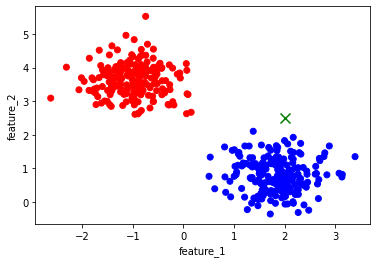

In [ ]:
plt.scatter(x=data['feature_1'],y=data['feature_2'],c=label_color)
plt.xlabel('feature_1')
plt.ylabel('feature_2')
plt.scatter(x=2,y=2.5,marker="x",c="g",s=100)
plt.show()

In [ ]:
print(y_pred1)

['1']


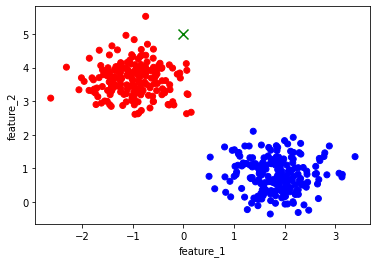

In [ ]:
plt.scatter(x=data['feature_1'],y=data['feature_2'],c=label_color)
plt.xlabel('feature_1')
plt.ylabel('feature_2')
plt.scatter(x=0,y=5,marker="x",c="g",s=100)
plt.show()

In [ ]:
print(y_pred2)

['0']


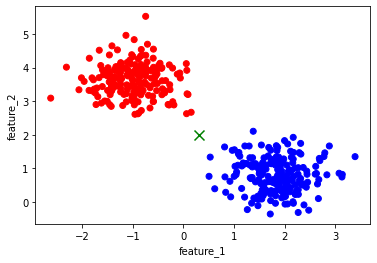

In [ ]:
plt.scatter(x=data['feature_1'],y=data['feature_2'],c=label_color)
plt.xlabel('feature_1')
plt.ylabel('feature_2')
plt.scatter(x=0.3,y=2,marker="x",c="g",s=100)
plt.show()

In [ ]:
print(y_pred3)

['1']


Success! Each of the predictions matched our intuition!

# KNN on Real World Data

We tested the algorithm on a small, artificial dataset with only 2 features, but how well does it perform on real world data with potentially many features?

We will be using the breast cancer dataset once again to hopefully find an answer to this question.

## Loading and Preprocessing the Data

In [ ]:
url = 'https://raw.githubusercontent.com/ishaandey/node/master/week-7/workshop/breast_cancer.csv'
df  = pd.read_csv(url)


df = df.drop(columns=['id','Unnamed: 32'])
df['diagnosis'] = df['diagnosis'].map({'M':1,'B':0})


X = df.drop(columns=['diagnosis'])
y = df['diagnosis']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Fitting the Model

In [ ]:
clf = KNeighborsClassifier()
clf.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

By default, the KNeighborsClassifier uses a value of K=5.

In [ ]:
predicted = clf.predict(X_test)
actual = np.array(y_test)

print('Look at first 10 predictions:')
print('Predicted: ',predicted[:10])
print('Actual:    ',actual[:10])

Look at first 10 predictions:
Predicted:  [0 1 1 0 0 1 1 1 0 0]
Actual:     [0 1 1 0 0 1 1 1 0 0]


In [ ]:
k5 = accuracy_score(predicted,actual)
print(k5)

0.956140350877193


Looks like the default classifier gave a pretty decent score. However, we need to note that accuracy is not a great metric for determining model performance and the score itself is relative.

This is still lower than the score gleaned by the Random Forest model.

## What value of K?

While the default classifier was decent, we can also adjust the number of neighbors that the model looks at to get potentially better results. 

In [ ]:
k_values = [1,5,10,50,200]
scores = []

In [ ]:
clf1 = KNeighborsClassifier(n_neighbors=1)
clf1.fit(X_train, y_train)
predicted = clf1.predict(X_test)
actual = np.array(y_test)
k1 = accuracy_score(predicted,actual)
scores.append(k1)
scores.append(k5)
print(k1)

0.9298245614035088


In [ ]:
clf10 = KNeighborsClassifier(n_neighbors=10)
clf10.fit(X_train, y_train)
predicted = clf10.predict(X_test)
actual = np.array(y_test)
k10 = accuracy_score(predicted,actual)
scores.append(k10)
print(k10)

0.9649122807017544


In [ ]:
clf50 = KNeighborsClassifier(n_neighbors=50)
clf50.fit(X_train, y_train)
predicted = clf50.predict(X_test)
actual = np.array(y_test)
k50 = accuracy_score(predicted,actual)
scores.append(k50)
print(k50)

0.9473684210526315


In [ ]:
clf200 = KNeighborsClassifier(n_neighbors=200)
clf200.fit(X_train, y_train)
predicted = clf200.predict(X_test)
actual = np.array(y_test)
k200 = accuracy_score(predicted,actual)
scores.append(k200)
print(k200)

0.9035087719298246


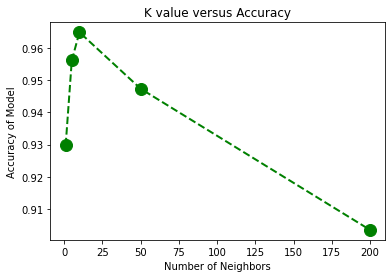

In [ ]:
plt.plot(k_values,scores,'go--', linewidth=2, markersize=12)
plt.xlabel('Number of Neighbors')
plt.ylabel('Accuracy of Model')
plt.title('K value versus Accuracy')
plt.show()

As we can see, adding more neighbors does not equate to higher model accuracy. Each dataset is unique, and we need to select a value for K based on the nuances in the data to get the best performance from our KNN model.

For this particular dataset, a K value of 10 (look for the 10 nearest datapoints) gave us the best results on the unknown data.